<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#循环神经网络结构" data-toc-modified-id="循环神经网络结构-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>循环神经网络结构</a></span></li><li><span><a href="#参数学习——误差的随时间反向传播算法" data-toc-modified-id="参数学习——误差的随时间反向传播算法-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>参数学习——误差的随时间反向传播算法</a></span></li><li><span><a href="#长短期记忆神经网络（Long-Short-Term-Memory，LSTM）" data-toc-modified-id="长短期记忆神经网络（Long-Short-Term-Memory，LSTM）-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>长短期记忆神经网络（Long Short Term Memory，LSTM）</a></span></li><li><span><a href="#门控循环单元（Gated-Recurrent-Unit，GRU）" data-toc-modified-id="门控循环单元（Gated-Recurrent-Unit，GRU）-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>门控循环单元（Gated Recurrent Unit，GRU）</a></span></li></ul></div>

# 循环神经网络（Recurrent Neural Network，RNN）

## 循环神经网络结构

数据集  
$$\big\{\left(\mathbf{x}_t,\mathbf{y}_t\right)\big\}_{t=1}^T$$
其中，  
第$t$时刻输入数据$\mathbf{x}_t=\left(x_t^{\left(1\right)},x_t^{\left(2\right)},\dots,x_t^{\left(n\right)}\right)^{\top}\in\mathbb{R}^n,$   
第$t$时刻输出数据$\mathbf{y}_t=\left(y_t^{\left(1\right)},y_t^{\left(2\right)},\dots,y_t^{\left(m\right)}\right)^{\top}\in\mathbb{R}^m$

循环神经网络模型结构
$$\begin{align} 
\left\{ 
\begin{array}{**lr**} 
\mathbf{h}_t=f\left(\mathbf{W}\centerdot\mathbf{x}_t+\mathbf{U}\centerdot\mathbf{h}_{t-1}\right) & \\ 
{\mathbf{y}}_t=f\left( \mathbf{V}\centerdot\mathbf{h}_t\right) \\ 
\end{array} 
\right. 
\end{align} $$  
其中，$\mathbf{h}$为隐状态，$f\left(\cdot\right)$为非线性激活函数，$\mathbf{U},\mathbf{W},\mathbf{V}$为模型参数。

## 参数学习——误差的随时间反向传播算法

第$t$时刻模型的损失函数
$$\mathcal{L}_t=\mathcal{L}\left(\mathbf{y}_t,\hat{\mathbf{y}}_t\right)$$

数据集上模型的损失函数
$$\mathcal{L}=\sum_{t=1}^T\mathcal{L}_t$$

第$t$时刻隐藏层净输入
$$\mathbf{z}_t=\mathbf{W}\centerdot\mathbf{x}_t+\mathbf{U}\centerdot\mathbf{h}_{t-1}$$

由于，第$t$时刻隐藏层净输入$\mathbf{z}$关于参数$u_{ij}$的直接偏导（公式$\mathbf{z}$中保持$\mathbf{h}_{t-1}$保持不变）
$$\begin{align}
\frac{\partial^{+} \mathbf{z}_{k}}{\partial u_{i j}}&=\left[0,\cdots,\left[\mathbf{h}_{t-1}\right]_j,\cdots,0\right] \\
&\triangleq \mathbb{I}_{i}\left(\left[\mathbf{h}_{t-1}\right]_{j}\right)
\end{align}$$
其中，$\mathbb{I}_i\left(x\right)$为仅第$i$列值为$x$，其余列为0的行向量，$\left[\mathbf{h}_{t-1}\right]_j$为第$t-1$时刻隐状态的第$j$维。  

以及，定义误差项$\delta_{tk}$为第$t$时刻损失函数对第$k$时刻隐藏层的净输入$\mathbf{z}_k$的偏导
$$\begin{aligned} 
\delta_{t, k} &=\frac{\partial \mathcal{L}_{t}}{\partial \mathbf{z}_{k}} \\ 
&=\frac{\partial \mathbf{h}_{k}}{\partial \mathbf{z}_{k}} \frac{\partial \mathbf{z}_{k+1}}{\partial \mathbf{h}_{k}} \frac{\partial \mathcal{L}_{t}}{\partial \mathbf{z}_{k+1}} \\ 
&=\operatorname{diag}\left(f^{\prime}\left(\mathbf{z}_{k}\right)\right) U^{\mathrm{T}} \delta_{t, k+1} \\
&=\prod_{i=k}^{t-1}\operatorname{diag}\left(f^{\prime}\left(\mathbf{z}_{k}\right)\right) U^{\mathrm{T}} \delta_{t,t}
\end{aligned}$$

所以，第$t$时刻损失函数$\mathcal{L}_t$关于参数$u_{ij}$的偏导
$$\begin{align}
\frac{\partial \mathcal{L}_{t}}{\partial u_{i j}}&=\sum_{k=1}^{t} \frac{\partial^{+} \mathbf{z}_{k}}{\partial u_{i j}} \frac{\partial \mathcal{L}_{t}}{\partial \mathbf{z}_{k}} \\
&=\sum_{k=1}^{t}\left[\delta_{t, k}\right]_{i}\left[\mathbf{h}_{k-1}\right]_{j}
\end{align}$$
矩阵形式为
$$
\frac{\partial \mathcal{L}_{t}}{\partial U}=\sum_{k=1}^{t} \delta_{t, k} \mathbf{h}_{k-1}^{\mathrm{T}}
$$
数据集的损失函数$\mathcal{L}$关于参数$U$的偏导
$$
\frac{\partial \mathcal{L}}{\partial U}=\sum_{t=1}^{T} \sum_{k=1}^{t} \delta_{t, k} \mathbf{h}_{k-1}^{\mathrm{T}}
$$

同理，得第$t$时刻损失函数$\mathcal{L}_t$关于参数$\mathbf{W}$的偏导
$$
\frac{\partial \mathcal{L}}{\partial W}=\sum_{t=1}^{T} \sum_{k=1}^{t} \delta_{t, k} \mathbf{x}_{k}^{\mathrm{T}}
$$

令
$$\gamma=\prod_{i=k}^{t-1}\operatorname{diag}\left(f^{\prime}\left(\mathbf{z}_{k}\right)\right) U^{\mathrm{T}} $$
则$$\delta_{t,k}=\gamma^{t-k}\delta_{t,t}$$
若$\|\gamma\|>1$，当$t-k\to\infty$，系统出现梯度爆炸现象；  
若$\|\gamma\|<1$，当$t-k\to 0$，系统出现梯度消失现象。

## 长短期记忆神经网络（Long Short Term Memory，LSTM）

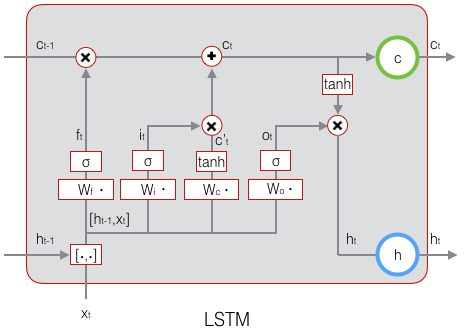

遗忘们：
$$\mathbf{f}_t=\sigma\left(W_{fh}\mathbf{h}_{t-1}+W_{fx}\mathbf{x}_t+\mathbf{b}_f\right)$$
输入门：
$$\begin{align}
\mathbf{i}_t &= \sigma\left(W_{ih}\mathbf{h}_{t-1}+W_{ix}\mathbf{x}_t+\mathbf{b}_i\right)  \\
\tilde{\mathbf{c}}_t &= \tanh\left(W_{ch}\mathbf{h}_{t-1}+W_{cx}\mathbf{x}_t+\mathbf{b}_c\right)
\end{align}$$
输出门：
$$\begin{align}
\mathbf{c}_t&=\mathbf{f}_t\circ\mathbf{c}_{t-1}+\mathbf{i}_t\circ\tilde{\mathbf{c}}_t \\
\mathbf{o}_t&=\sigma\left(W_{oh}\mathbf{h}_{t-1}+W_{ox}\mathbf{x}_t+\mathbf{b}_o\right) \\
\mathbf{h}_t&=\mathbf{o}_t\circ\tanh\left(\mathbf{c}_t\right)
\end{align}$$

## 门控循环单元（Gated Recurrent Unit，GRU）

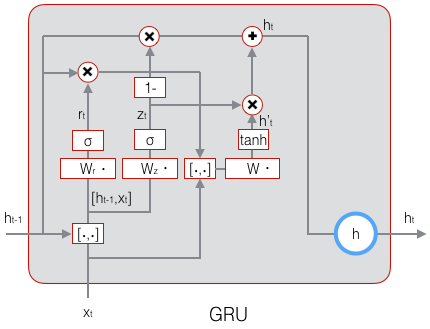

更新门：
$$
\mathbf{z}_{t}=\sigma\left(W_{z} \cdot\left[\mathbf{h}_{t-1}, \mathbf{x}_{t}\right]\right)
$$
重置门：
$$
\mathbf{r}_{t}=\sigma\left(W_{r} \cdot\left[\mathbf{h}_{t-1}, \mathbf{x}_{t}\right]\right)
$$
输出门：
$$
\begin{aligned} \tilde{\mathbf{h}}_{t} &=\tanh \left(W \cdot\left[\mathbf{r}_{t} \circ \mathbf{h}_{t-1}, \mathbf{x}_{t}\right]\right) \\ \mathbf{h} &=\left(1-\mathbf{z}_{t}\right) \circ \mathbf{h}_{t-1}+\mathbf{z}_{t} \circ \tilde{\mathbf{h}}_{t} \end{aligned}
$$